In [5]:
import torch
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import os

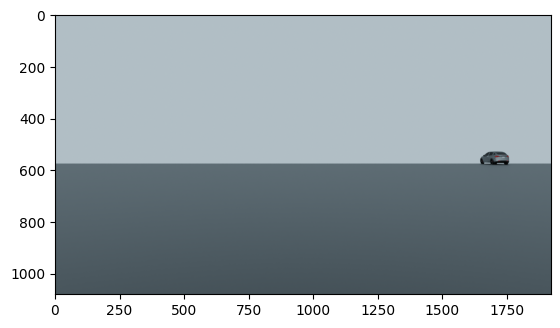

In [6]:
img = cv.imread("/Users/mohamedmafaz/Desktop/Test/Distance_1-1600/Car1564.png")
img = cv.cvtColor(img , cv.COLOR_BGR2RGB)
plt.imshow(img)

In [207]:
import requests

with open("Distance_data.csv" , "wb") as f:
  request = requests.get("https://github.com/Mafaz03/Datasets/raw/main/Distance_data.csv")
  f.write(request.content)

In [244]:
data = pd.read_csv("Distance_data.csv")
data = data.drop(["Unnamed: 0"] , axis = 1)
data.head(10)

,Frame,Area,Center_x,Center_y,Distance,LocX,LocY,LocZ
0,1,6878.4310,186.710098,582.234772,57.418060,-28.85,49.64,0.0
1,2,7147.4270,187.249649,583.093475,57.022337,-28.68,49.29,0.0
2,3,7245.6400,186.668839,583.830872,56.626630,-28.50,48.93,0.0
3,4,7322.2715,187.215378,584.350525,56.230941,-28.33,48.57,0.0
4,5,7368.9434,186.398407,584.663605,55.835265,-28.16,48.22,0.0
5,6,7310.1226,185.458252,584.575195,55.439603,-27.98,47.86,0.0
6,7,7214.0750,184.747055,584.475494,55.043962,-27.81,47.50,0.0
7,8,7292.5440,184.817734,584.719910,54.648336,-27.64,47.14,0.0
8,9,7391.6836,184.380676,585.002472,54.252729,-27.46,46.79,0.0
9,10,7454.7856,184.624619,585.197449,53.857139,-27.29,46.43,0.0


In [9]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model

Using cache found in /Users/mohamedmafaz/.cache/torch/hub/ultralytics_yolov5_master
WARNING ⚠️ invalid check_version(5.9.5, ) requested, please check values.
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
/bin/sh: pip: command not found
requirements: ❌ Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 127.
YOLOv5 🚀 2023-9-24 Python-3.9.6 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [11]:
model.to(device)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [12]:
def get_dist(link : str , model , h , f):
  link = link
  result = model(link).xywh[0]
  d_ = (h * f) / result[0][3]
  return float(d_)

In [290]:
def get_dis_Loc(link : str , look_up_table : pd.core.frame.DataFrame , h_ = 1.6 , f = 1714) -> tuple[float , float , float]:
  """
  Input : Gets Image
  Output : relates it to lookup table and gets LocX and LocY

  """


  link = link
  img = cv.imread(link)
  result = model(img)

  cordinates = result.xywh[0].cpu().numpy()[0]


  Center_x = cordinates[0] + (cordinates[2] / 2)
  Center_y = cordinates[1] + (cordinates[3] / 2)

  d_ = (h_ * f / cordinates[3])
  look_up_table["difference_"] = abs(look_up_table["Distance"] - d_)


  if Center_x > (1920/2):
    data_sub = look_up_table.loc[look_up_table["LocX"] >= 0]


  else:
    data_sub = look_up_table.loc[look_up_table["LocX"] < 0]


  data_sub["Center_x_"] = abs(data_sub["Center_x"] - Center_x)
  data_sub["Center_y_"] = abs(data_sub["Center_y"] - Center_y)
  data_sub["Center_difference_"] = (data_sub["Center_x_"] + data_sub["Center_y_"])/2

  data_min = data_sub["Center_difference_"].idxmin()
  LocX = data.at[data_min , "LocX"]
  LocY = data.at[data_min , "LocY"]

  return d_ , LocX , LocY

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [270]:
f = (55.2407 * 49.664859) / 1.6
f

1714.7009853508123

In [271]:
d_ , LocX , LocY = get_dis_Loc(link = "Distance_1-1600/Car00123.png" , look_up_table = data , h_ = 1.6 , f = f)
d_ , LocX , LocY

(50.163164731422924, -19.58, 47.97)

In [386]:
def distance_accuracy(link_short : str , ranges , model , data , h_ = 1.6 , f = 1714):

  """
  Input : Gets shortend link and model to detect object and Lookup table
  Output : Difference between actual and predicted Location and Difference
  """

  dis_diff_dict = {}
  loc_diff_dict = {}
  

  for frame in ranges:
    
    link = f"{link_short}{frame:05d}.png"
    # print("LINK : ",link)
    img = cv.imread(link)
    results = model(img)

    if results.xyxy[0].shape[0] != 0:
      cord = results.xyxy[0].cpu().numpy()[0]
      dis_cord = results.xywh[0].cpu().numpy()[0]

      d_ , LocX , LocY = get_dis_Loc(link = link , look_up_table = data , h_ = h_ , f = f)

      if data[data.Frame == frame].Distance.empty == True: # will return True if the prediction is able to be done in this run but not when lookup table was being built
        pass
      else:
        actual_dis = float(data[data.Frame == frame].Distance)
        actual_locX = data[data.Frame == frame].LocX
        actual_locY = data[data.Frame == frame].LocY

        dis_diff = actual_dis - d_
        loc_diff = float(((actual_locX - LocX) + (actual_locY - LocY)) / 2)

        dis_diff_dict[frame] = dis_diff
        loc_diff_dict[frame] = loc_diff


    else:
      pass
      # print(f"Failed to detect at frame : {frame}")



    if img is not None:
      pass
      # print(f"Frame analysed : {frame}")
    else:
      pass
      # print(f"Frame failed to be analysed {frame}")

  loc_df = pd.DataFrame([loc_diff_dict]).transpose()
  loc_df.columns = ["Location_difference"]

  dis_df = pd.DataFrame([dis_diff_dict]).transpose()
  dis_df.columns = ["Distance_difference"]
    
  return loc_df , dis_df
  

In [203]:
loc_diff_df , dis_diff_df = distance_accuracy(link_short = "Distance_1-1600/Car" , ranges=range(1,1600) , model = model , data = data)

LINK :  Distance_1-1600/Car00001.png
Frame analysed : 1
LINK :  Distance_1-1600/Car00002.png
Frame analysed : 2
LINK :  Distance_1-1600/Car00003.png
Frame analysed : 3
LINK :  Distance_1-1600/Car00004.png
Frame analysed : 4
LINK :  Distance_1-1600/Car00005.png
Frame analysed : 5
LINK :  Distance_1-1600/Car00006.png
Frame analysed : 6
LINK :  Distance_1-1600/Car00007.png
Frame analysed : 7
LINK :  Distance_1-1600/Car00008.png
Frame analysed : 8
LINK :  Distance_1-1600/Car00009.png
Frame analysed : 9
LINK :  Distance_1-1600/Car00010.png
Frame analysed : 10
LINK :  Distance_1-1600/Car00011.png
Frame analysed : 11
LINK :  Distance_1-1600/Car00012.png
Frame analysed : 12
LINK :  Distance_1-1600/Car00013.png
Frame analysed : 13
LINK :  Distance_1-1600/Car00014.png
Frame analysed : 14
LINK :  Distance_1-1600/Car00015.png
Frame analysed : 15
LINK :  Distance_1-1600/Car00016.png
Frame analysed : 16
LINK :  Distance_1-1600/Car00017.png
Frame analysed : 17
LINK :  Distance_1-1600/Car00018.png
Fra

In [242]:
loc_diff_df["Frame"] = list(loc_diff_df.index)
loc_diff_df

,Location_difference,Frame
1,0.000,1
2,0.000,2
3,0.000,3
4,0.000,4
5,0.000,5
...,...,...
1595,-0.080,1595
1596,-0.085,1596
1597,-0.085,1597
1598,-0.080,1598


In [241]:
dis_diff_df["Frame"] = list(dis_diff_df.index)
dis_diff_df

,Distance_difference,Frame
1,5.577532,1
2,6.327856,2
3,6.475857,3
4,6.275212,4
5,6.257614,5
...,...,...
1595,4.000128,1595
1596,3.522773,1596
1597,3.805289,1597
1598,4.182452,1598


In [210]:
dis_diff_df.shape

(1520, 1)

In [211]:
loc_diff_df.shape

(1520, 1)

In [246]:
data = pd.merge(pd.merge(data , loc_diff_df , on = "Frame" , how = "right") , dis_diff_df , on = "Frame" , how = 'right')
data


,Frame,Area,Center_x,Center_y,Distance,LocX,LocY,LocZ,Location_difference,Distance_difference
0,1,6878.4310,186.710098,582.234772,57.418060,-28.85,49.64,0.0,0.000,5.577532
1,2,7147.4270,187.249649,583.093475,57.022337,-28.68,49.29,0.0,0.000,6.327856
2,3,7245.6400,186.668839,583.830872,56.626630,-28.50,48.93,0.0,0.000,6.475857
3,4,7322.2715,187.215378,584.350525,56.230941,-28.33,48.57,0.0,0.000,6.275212
4,5,7368.9434,186.398407,584.663605,55.835265,-28.16,48.22,0.0,0.000,6.257614
...,...,...,...,...,...,...,...,...,...,...
1515,1595,6524.9014,1866.961365,581.721222,57.970451,29.34,50.00,0.0,-0.080,4.000128
1516,1596,6216.9420,1871.673462,580.437622,58.054977,29.50,50.00,0.0,-0.085,3.522773
1517,1597,6244.3820,1877.444397,580.571594,58.139856,29.67,50.00,0.0,-0.085,3.805289
1518,1598,6185.3350,1880.990479,581.242676,58.225090,29.84,50.00,0.0,-0.080,4.182452


In [287]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Define the desired percentile range (in this case, 80%)
lower_percentile = 10  # Lower bound of the range (e.g., 10%)
upper_percentile = 70  # Upper bound of the range (e.g., 90%)

# Calculate the lower and upper values for the specified percentiles
lower_value = np.percentile(data['Distance_difference'], lower_percentile)
upper_value = np.percentile(data['Distance_difference'], upper_percentile)


data['difference_normalized'] = scaler.fit_transform(data[['Distance_difference']])
data['location_normalized'] = scaler.fit_transform(data[['Location_difference']])
data.head()

,Frame,Area,Center_x,Center_y,Distance,...,difference_,Location_difference,Distance_difference,difference_normalized,location_normalized
0,1,6878.4310,186.710098,582.234772,57.418060,...,8.198254,0.0,5.577532,0.689877,-1.0
1,2,7147.4270,187.249649,583.093475,57.022337,...,7.802531,0.0,6.327856,0.948907,-1.0
2,3,7245.6400,186.668839,583.830872,56.626630,...,7.406823,0.0,6.475857,1.000000,-1.0
3,4,7322.2715,187.215378,584.350525,56.230941,...,7.011134,0.0,6.275212,0.930733,-1.0
4,5,7368.9434,186.398407,584.663605,55.835265,...,6.615458,0.0,6.257614,0.924657,-1.0


In [50]:
data.difference__normalized.min() , data.difference__normalized.max()

(-1.0, 1.0)

In [ ]:
from matplotlib.patches import Circle

In [319]:
def plot_circles(data : pd.DataFrame , column : "str" , ranges , transperencey : float = 0.2 , radius : int = 10 , transperencey_padding : float = 0.0 ):
    circle_data = []

    """
    Setting metric for custom heatmap
    """

    color = (0.0 , 0.0 , 0.0 , 0.0)

    for frame in ranges:
        info = data[data.Frame == frame]
        if info.empty == False:
            # print(frame)

            col_normalized = round(float(info[column]) , 2)
            if col_normalized  >= 0:
                if col_normalized >= 1:
                    color = (0.0 , 0.0 , 1.0 , transperencey + transperencey_padding)

                else:
                    color = (0.0 , 0.0 , col_normalized , 0.9)

                    if col_normalized >=2 : 
                        color = (0.0 , 0.0 , 1.0 , 0)

                    else:
                        color = (0.0 , 0.0 , 1.0 , transperencey + transperencey_padding)


            else: 
                if col_normalized < 0:
                    color = (1.0 , 0.0 , 0.0 , transperencey - transperencey_padding)

                    if col_normalized <= -1:
                        color = (1.0 , 0.0 , 0.0 , transperencey + transperencey_padding)
                        if col_normalized <= -2 : 
                            color = (1.0 , 0.0 , 0.0 , 0)
                    else:
                        color = (1.0 , 0.0 , 0.0 , 0.1)
                else:
                    color = (abs(col_normalized) , 0.0 , 0.0 , transperencey - transperencey_padding)

        # print(color)
            
            circle_data.append({"center" : (float(info.LocX) , float(info.LocY)) , 'radius' : radius , "fill_color" : color})
    return circle_data

In [263]:
circle_data = plot_circles(column = "difference_normalized" , transperencey= 0.3 , radius=10 , 
                           ranges = range(1 , 1600 ,30) , transperencey_padding=0.1)

def custom_heatmap(circle_data : list[dict] , size : int = 1080 , save_name : str = "plot.png" , 
                   x_label : str = "x" , y_label : str = "y" , 
                   title : str = "Plot"):


    fig, ax = plt.subplots(figsize=(size / 100, size / 100), dpi=100)


    for circle_props in circle_data:
        circle = Circle(circle_props['center'], circle_props['radius'], fill=True, facecolor=circle_props['fill_color'])
        ax.add_patch(circle)

    # Set axis limits
    ax.set_xlim(-40, 40)
    ax.set_ylim(-10, 60)

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.gca().set_aspect('equal', adjustable='box')  # Ensure aspect ratio is equal
    # plt.grid(True)

    plt.savefig(save_name , bbox_inches='tight', pad_inches=0, dpi=100)


In [281]:
custom_heatmap(circle_data = circle_data , save_name = "Testing modular")

In [292]:
data

,Frame,Area,Center_x,Center_y,Distance,...,difference_,Location_difference,Distance_difference,difference_normalized,location_normalized
0,1,6878.4310,186.710098,582.234772,57.418060,...,5.062509,0.000,5.577532,0.848548,0.725490
1,2,7147.4270,187.249649,583.093475,57.022337,...,4.666786,0.000,6.327856,0.975048,0.725490
2,3,7245.6400,186.668839,583.830872,56.626630,...,4.271079,0.000,6.475857,1.000000,0.725490
3,4,7322.2715,187.215378,584.350525,56.230941,...,3.875390,0.000,6.275212,0.966173,0.725490
4,5,7368.9434,186.398407,584.663605,55.835265,...,3.479714,0.000,6.257614,0.963206,0.725490
...,...,...,...,...,...,...,...,...,...,...,...
1515,1595,6524.9014,1866.961365,581.721222,57.970451,...,5.614900,-0.080,4.000128,0.582608,0.620915
1516,1596,6216.9420,1871.673462,580.437622,58.054977,...,5.699426,-0.085,3.522773,0.502129,0.614379
1517,1597,6244.3820,1877.444397,580.571594,58.139856,...,5.784305,-0.085,3.805289,0.549759,0.614379
1518,1598,6185.3350,1880.990479,581.242676,58.225090,...,5.869539,-0.080,4.182452,0.613347,0.620915


In [324]:
data[data.Distance == 55.2407]

,Frame,Area,Center_x,Center_y,Distance,...,difference_,Location_difference,Distance_difference,difference_normalized,location_normalized


In [357]:
result = model(cv.imread("/Users/mohamedmafaz/Desktop/Test/Distance_1-1600/Car00801.png"))
result.xywh

[tensor([[9.62975e+02, 5.54891e+02, 6.48305e+01, 5.38580e+01, 3.16357e-01, 2.00000e+00]])]

In [373]:
data[data.Frame == ]

,Frame,Area,Center_x,Center_y,Distance,...,difference_,Location_difference,Distance_difference,difference_normalized,location_normalized
0,1,6878.431,186.710098,582.234772,57.41806,...,5.991331,0.0,5.577532,3.014342,-0.45942


In [358]:
5.38580e+01 * 	49.32975

2656.8016755

In [341]:
55.2407 * 49.664859

2743.5215765612998

In [381]:
[i/1.6 for i in range(2100 , 3200 , 100)]

[1312.5,
 1375.0,
 1437.5,
 1500.0,
 1562.5,
 1625.0,
 1687.5,
 1750.0,
 1812.5,
 1875.0,
 1937.5]

f = 1312.5 Completed
f = 1375.0 Completed
f = 1437.5 Completed
f = 1500.0 Completed
f = 1562.5 Completed
f = 1625.0 Completed
f = 1687.5 Completed
f = 1750.0 Completed
f = 1812.5 Completed
f = 1875.0 Completed
f = 1937.5 Completed


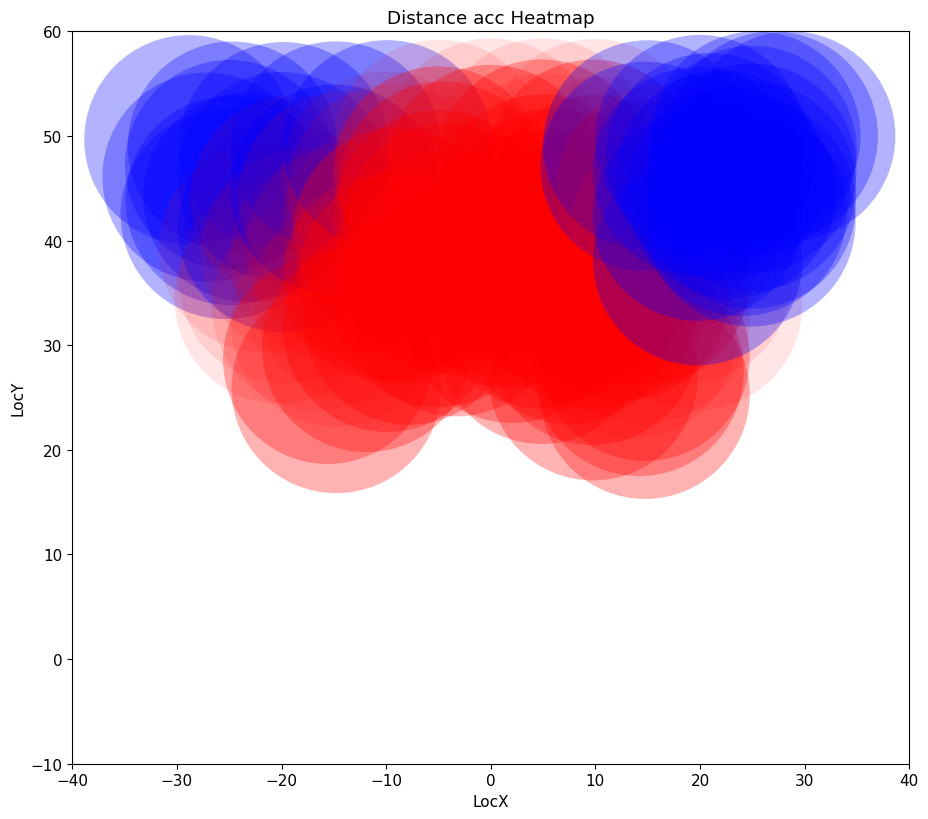

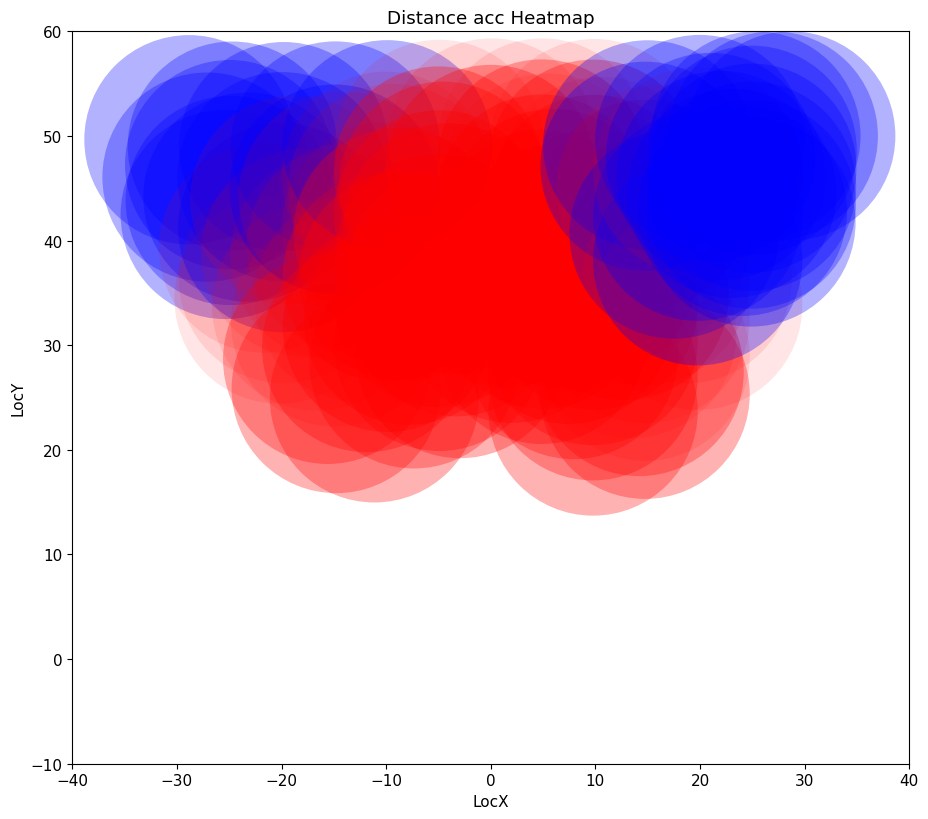

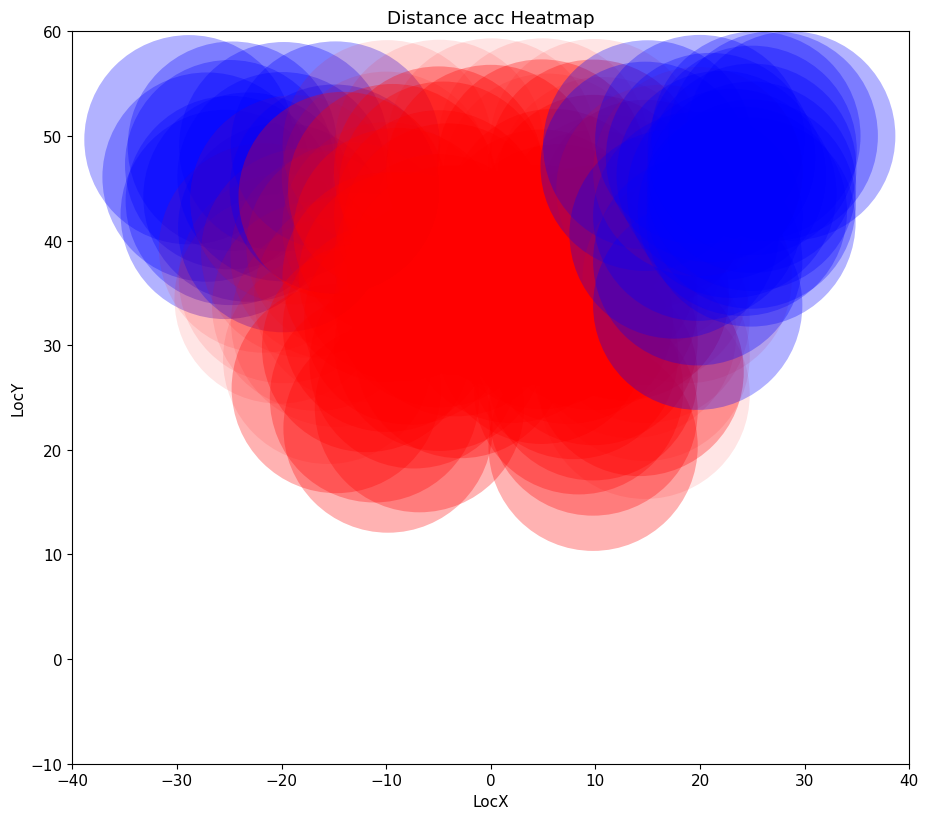

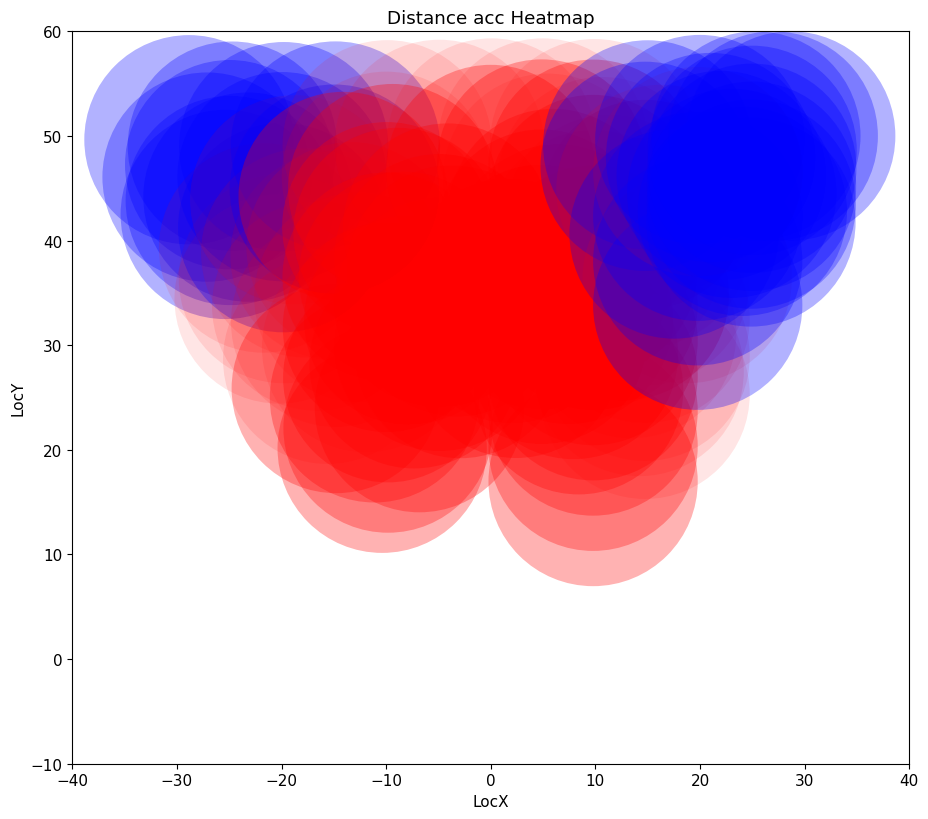

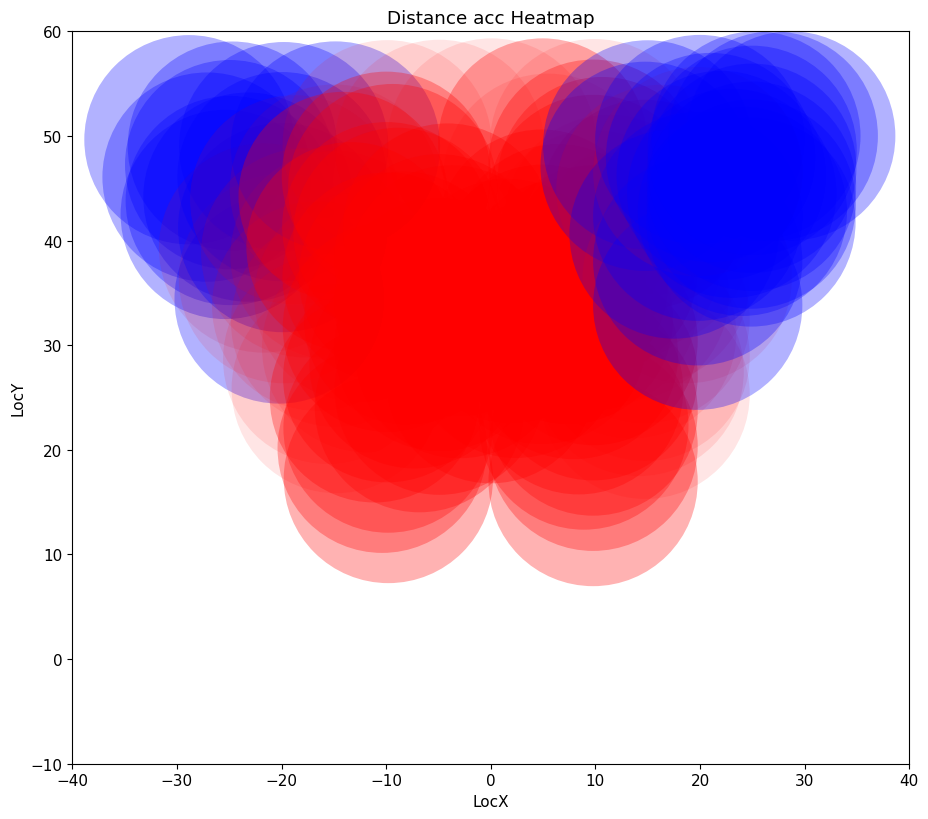

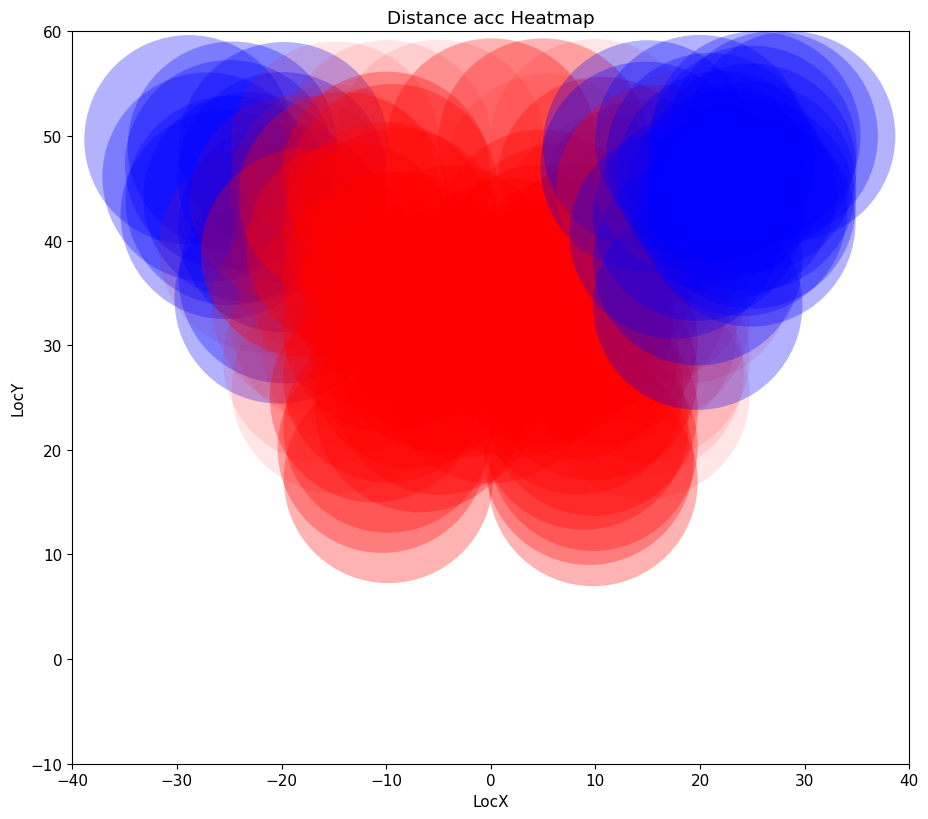

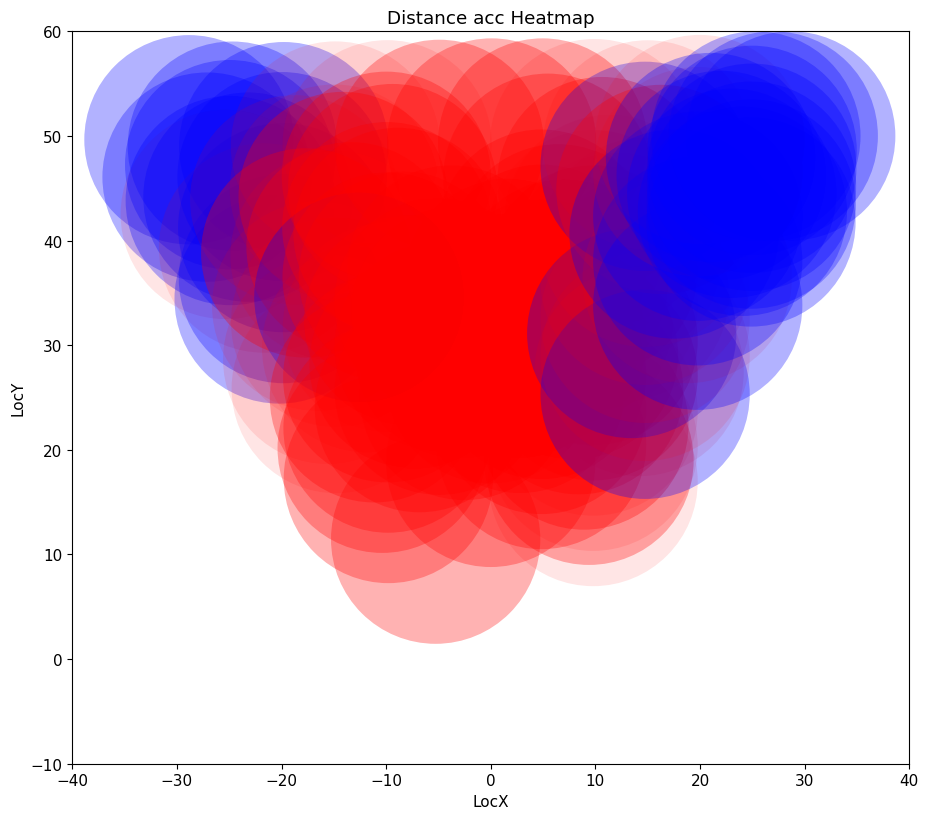

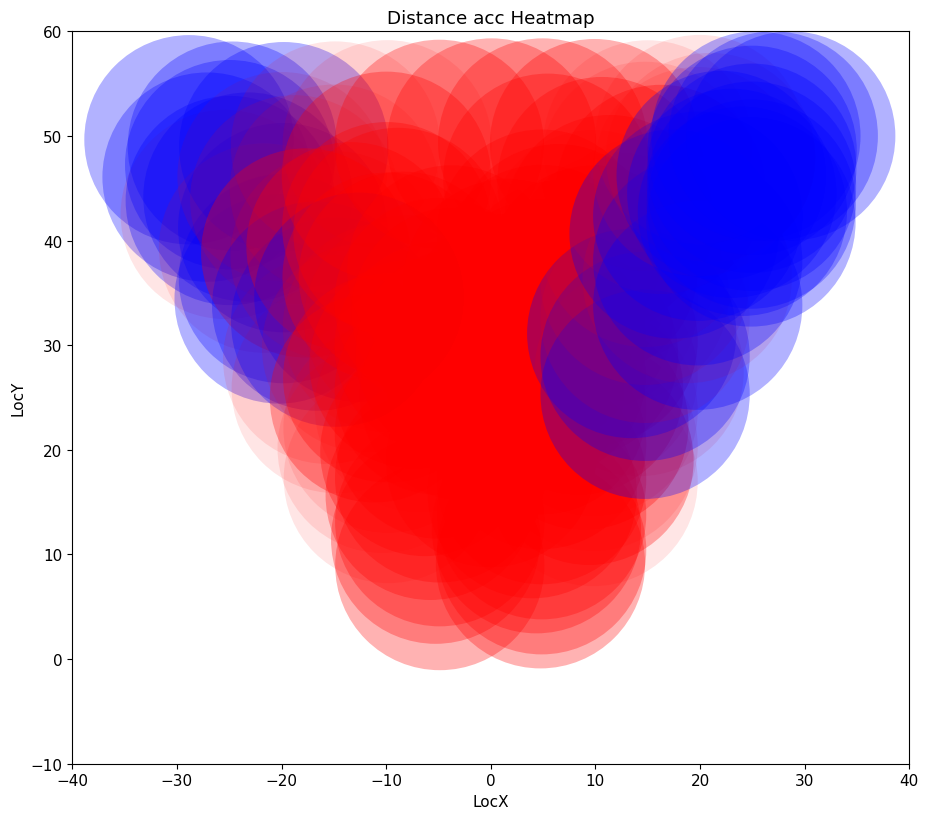

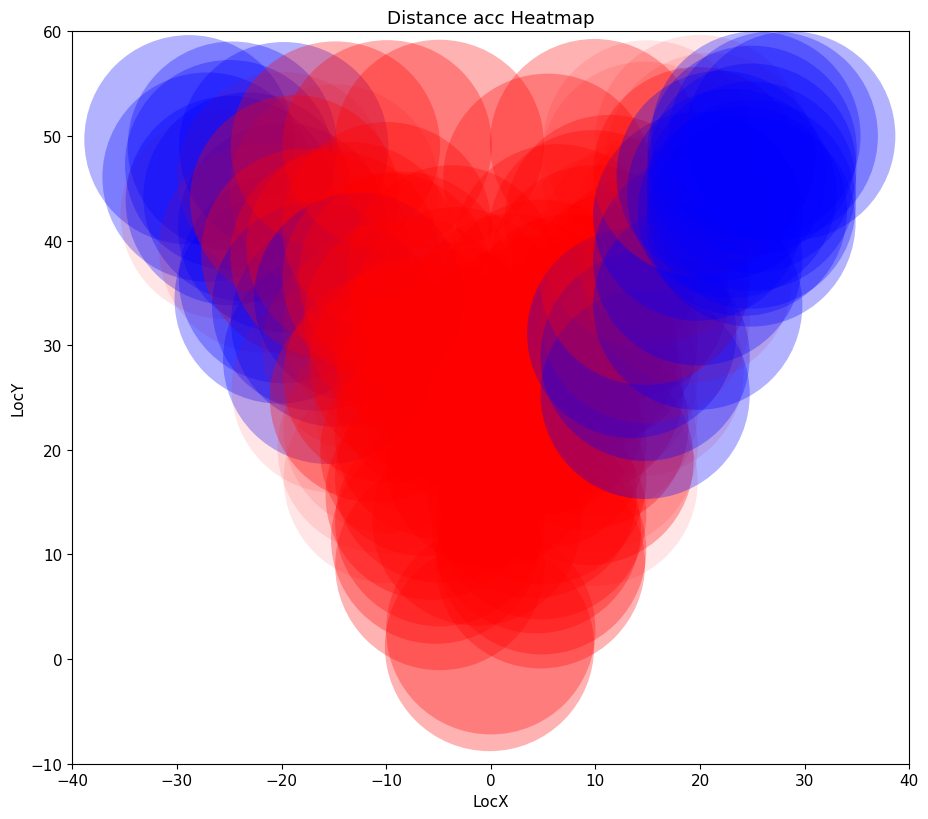

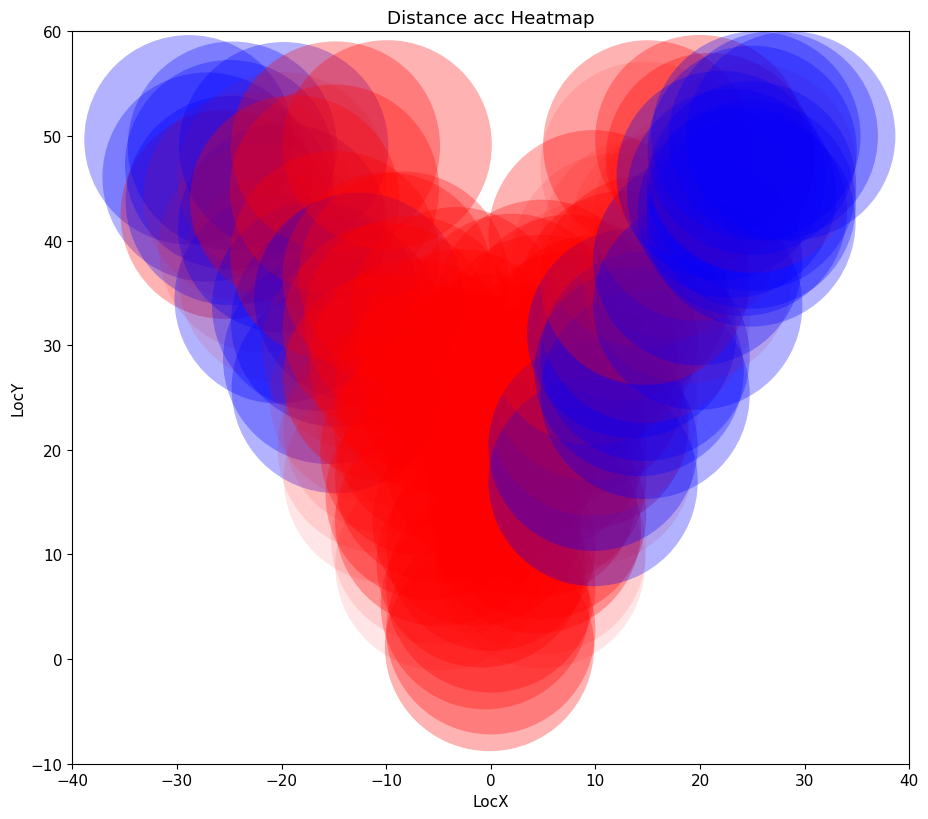

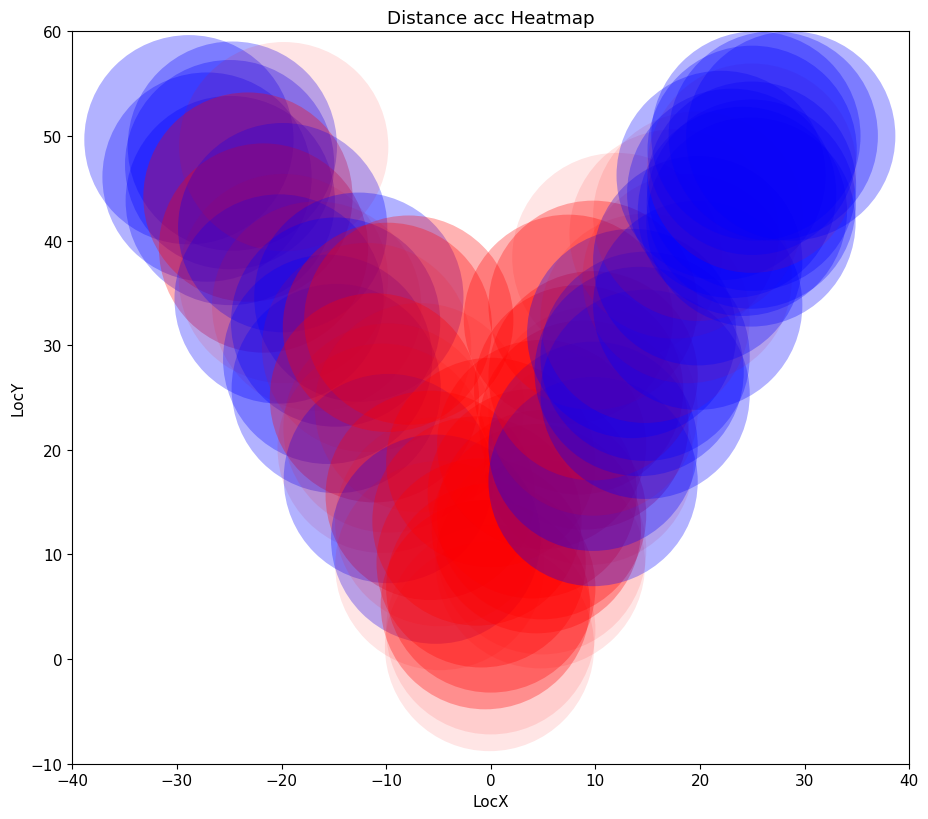

In [390]:

for f in [1312.5 , 1375.0 , 1437.5 , 1500.0 , 1562.5 , 1625.0 , 1687.5 , 1750.0 , 1812.5 , 1875.0 , 1937.5]:


    data = pd.read_csv("Distance_data.csv")
    data = data.drop(["Unnamed: 0"] , axis = 1)

    final_range = 1600
    skip = 10



    loc_diff_df , dis_diff_df = distance_accuracy(link_short = "Distance_1-1600/Car" , ranges=range(1,final_range , skip) , model = model , data = data , f = f)

    loc_diff_df["Frame"] = list(loc_diff_df.index)
    dis_diff_df["Frame"] = list(dis_diff_df.index)

    data = pd.merge(pd.merge(data , loc_diff_df , on = "Frame" , how = "right") , dis_diff_df , on = "Frame" , how = 'right')



    scaler = MinMaxScaler(feature_range=(-1, 1))


    lower_percentile = 80  # Lower bound of the range (e.g., 10%)
    upper_percentile = 90  # Upper bound of the range (e.g., 90%)

    # Calculate the lower and upper values for the specified percentiles
    lower_value = np.percentile(data['Distance_difference'], lower_percentile)
    upper_value = np.percentile(data['Distance_difference'], upper_percentile)

    data['difference_normalized'] = (data['Distance_difference'] - lower_value) / (upper_value - lower_value)
    data['location_normalized'] = (data['Location_difference'] - lower_value) / (upper_value - lower_value)


    circle_data = plot_circles(data = data , column = "difference_normalized" , transperencey= 0.3 , radius=10 , 
                            ranges = range(1 , final_range , skip) , transperencey_padding=0.0 )

    custom_heatmap(circle_data = circle_data , save_name = f"Distance_Heatmap_{f}.png" , x_label="LocX" , y_label="LocY" , title="Distance acc Heatmap")

    print(f"f = {f} Completed")


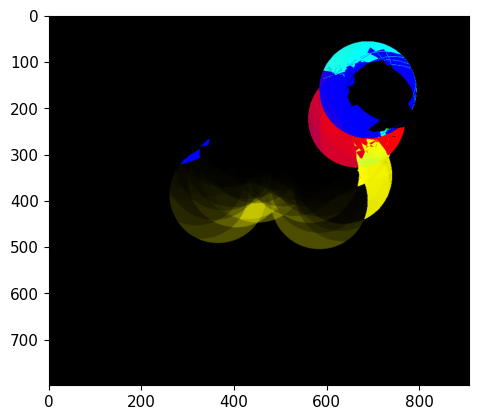

In [392]:
one = cv.imread("Distance_Heatmap_1312.5.png")
two = cv.imread("Distance_Heatmap_1375.0.png")

plt.imshow(one - two)